# Lab 01 - Data exploration and preprocessing

In [1]:
# import dependencies
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

## Introduction

### Objective of the lab

The quality of the data and the amount of useful information that it contains are key factors that determine how well a machine learning algorithm can learn.

Therefore, it is absolutely critical that we make sure to examine and preprocess a dataset before we feed it to a learning algorithm. 

In this laboratory we will explore the data exploration and preprocessing pipeline.

#### What is a Dataset?

A data set (or dataset) is a collection of data. In the case of tabular data, a data set corresponds to one or more database tables, where every **column** of a table represents a particular **variable**, and each **row** corresponds to a given **record of the data** set in question. The data set lists values for each of the variables, such as for example height and weight of an object, for each member of the data set. Data sets can also consist of a collection of documents or files

Several characteristics define a data set's structure and properties. These include the number and types of the attributes or variables, and various statistical measures applicable to them.

The values may be **numbers**, such as real numbers or integers, for example representing a person's height in centimeters, but may also be **nominal** data (i.e., not consisting of numerical values), for example representing a person's ethnicity. More generally, values may be of any of the kinds described as a level of measurement.

**Missing values** may exist, which must be indicated somehow.

[Data set - Wikipedia](https://en.wikipedia.org/wiki/Data_set)

### Dataset description

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

| Column Name | Data Type | Description | Possible Values |
|-------------|-----------|-------------|----------------|
| PassengerId | Integer   | Unique identifier for each passenger | 1, 2, 3, etc. |
| Survived    | Integer   | Survival indicator | 0 = No (Did not survive), 1 = Yes (Survived) |
| Pclass      | Integer   | Passenger ticket class | 1 = 1st/Upper, 2 = 2nd/Middle, 3 = 3rd/Lower |
| Name        | String    | Full name of the passenger | "Braund, Mr. Owen Harris", etc. |
| Sex         | String    | Gender of the passenger | "male", "female" |
| Age         | Float     | Age of the passenger in years | 22.0, 40.0, etc. (may contain missing values) |
| SibSp       | Integer   | Number of siblings/spouses aboard the Titanic | 0, 1, 2, etc. |
| Parch       | Integer   | Number of parents/children aboard the Titanic | 0, 1, 2, etc. |
| Ticket      | String    | Ticket number | "A/5 21171", "PC 17599", etc. |
| Fare        | Float     | Price paid for the ticket | 7.25, 71.2833, etc. |
| Cabin       | String    | Cabin number | "C85", "E46", etc. (many missing values) |
| Embarked    | String    | Port of embarkation | "C" = Cherbourg, "Q" = Queenstown, "S" = Southampton |

#### What are the different types of data?

The two main types of data are:

- Qualitative Data
- Quantitative Data

![types-of-data-img](img/types_of_data.png)

---

**Qualitative or Categorical Data**
   
Qualitative or Categorical Data is a type of data that can’t be measured or counted in the form of numbers. These types of data are sorted by category, not by number. That’s why it is also known as Categorical Data. 

These data consist of *audio, images, symbols, or text*. The gender of a person, i.e., male, female, or others, is qualitative data.

Qualitative data tells about the perception of people. This data helps market researchers understand the customers’ tastes and then design their ideas and strategies accordingly. 

The Qualitative data are further classified into two parts :
   
- **Nominal Data**

    Nominal Data is used to label variables without any order or quantitative value. The color of hair can be considered nominal data, as one color can’t be compared with another color.

    With the help of nominal data, we can’t do any numerical tasks or can’t give any order to sort the data. These data don’t have any meaningful order; their values are distributed into distinct categories.

- **Ordinal Data**

    Ordinal data have natural ordering where a number is present in some kind of order by their position on the scale. These data are used for observation like customer satisfaction, happiness, etc., but we can’t do any arithmetical tasks on them. 

    Ordinal data is qualitative data for which their values have some kind of relative position. These kinds of data can be considered “in-between” qualitative and quantitative data.

    The ordinal data only shows the sequences and cannot use for statistical analysis. Compared to nominal data, ordinal data have some kind of order that is not present in nominal data. 

--- 

**Quantitative Data**
   
Quantitative data is a type of data that can be expressed in numerical values, making it countable and including statistical data analysis. These kinds of data are also known as Numerical data.

It answers the questions like “how much,” “how many,” and “how often.” For example, the price of a *phone, the computer’s ram, the height or weight of a person, etc.,* falls under quantitative data. 

Quantitative data can be used for statistical manipulation. These data can be represented on a wide variety of graphs and charts, such as *bar graphs, histograms, scatter plots, boxplots, pie charts, line graphs, etc.*

- **Discrete Data**

    The term discrete means distinct or separate. The discrete data contain the values that fall under integers or whole numbers. The total number of students in a class is an example of discrete data. These data can’t be broken into decimal or fraction values.

    The discrete data are countable and their subdivision is not possible. These data are represented mainly by a bar graph, number line, or frequency table.

- **Continuous Data**

    Continuous data are in the form of fractional numbers. It can be the version of an android phone, the height of a person, the length of an object, etc. Continuous data represents information that can be divided into smaller levels. The continuous variable can take any value within a range. 

The key difference between discrete and continuous data is that discrete data contains the integer or whole number. Still, continuous data stores the fractional numbers to record different types of data such as temperature, height, width, time, speed, etc.

[Types Of Data - Great Learning](https://www.mygreatlearning.com/blog/types-of-data/)

## Dataset Loading

**What is Pandas?**

Pandas is an open-source software library designed for data manipulation and analysis. It provides data structures like series and DataFrames to easily clean, transform and analyze large datasets and integrates with other Python libraries, such as NumPy and Matplotlib.

It offers functions for data transformation, aggregation and visualization, which are important for analysis.

Pandas revolves around two primary Data structures: Series (1D) for single columns and DataFrame (2D) for tabular data enabling efficient data manipulation.

With pandas, you can perform a wide range of data operations, including

- Reading and writing data from various file formats like CSV, Excel and SQL databases.

- Cleaning and preparing data by handling missing values and filtering entries.

- Merging and joining multiple datasets seamlessly.

- ...

[Pandas Tutorial - geeksforgeeks](https://www.geeksforgeeks.org/pandas-tutorial/)

For this tutorial, the Titanic dataset will be provided in the format of a `.csv` file. We'll load it using <code>[pandas.read_csv()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)</code>.

In [2]:
DATASET_PATH = os.path.join("data", "lab-01", "Titanic-Dataset.csv")

# Load the dataset from the subfolder 'data/lab-01'
df = pd.read_csv(filepath_or_buffer=DATASET_PATH)

# Display the first 5 rows to check it's loaded correctly
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Dataset Overview

Now that we have successfully loaded our dataset, the next step is to dive into Exploratory Data Analysis (EDA). EDA is an essential early phase in any data science or machine learning project for several reasons:

- **Data Understanding**: EDA helps you learn what each column represents, the types of values present, and how variables might relate to the outcome you're interested in.

- **Anomaly Detection**: It allows you to spot outliers, missing values, and data entry errors that could compromise your analysis or model performance.

- **Data Cleaning Planning**: Insights from EDA guide how to handle missing data, transform variables, or drop irrelevant columns.

- **Feature Selection and Engineering**: By understanding relationships between variables, EDA helps you decide which features are most relevant for modeling.

- **Bias and Data Quality Assessment**: EDA can reveal biases, data leakage, or inconsistencies, ensuring a more robust and reliable analysis.

- **Hypothesis Generation**: It helps generate initial hypotheses and questions to be tested with more formal statistical methods.


**Check the Shape of the Dataset**

This step gives us a basic understanding of the dataset's size by returning the number of rows (observations) and columns (features). It's an essential first step in EDA to gauge how large and complex your dataset is, and to quickly catch any red flags (e.g., very small datasets or datasets with an unexpectedly large number of columns).



In [3]:
# Check the shape of the dataset (rows, columns)
# DataFrame.shape: Return a tuple representing the dimensionality of the DataFrame.

n_rows, n_cols = df.shape 
print(f"Our dataset is composed of {n_rows} rows, and {n_cols} columns")

Our dataset is composed of 893 rows, and 12 columns


**General Information About the Dataset**

This is a concise summary of the dataset, showing:

- Column names and types

- Number of non-null entries per column

- Memory usage

It helps quickly assess missing data, data types, and memory footprint.

In [4]:
# Display information about each column (data type, non-null values, etc.)
# DataFrame.info: Print a concise summary of a DataFrame.
# This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  893 non-null    int64  
 1   Survived     893 non-null    int64  
 2   Pclass       893 non-null    int64  
 3   Name         893 non-null    object 
 4   Sex          893 non-null    object 
 5   Age          718 non-null    float64
 6   SibSp        893 non-null    int64  
 7   Parch        893 non-null    int64  
 8   Ticket       893 non-null    object 
 9   Fare         893 non-null    float64
 10  Cabin        205 non-null    object 
 11  Embarked     892 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.8+ KB


Explore the unique values of our *target* using the <code>[pandas.unique](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html)</code> module.

In [5]:
print("Target unique values")
df["Survived"].unique()

Target unique values


array([0, 1])

<b style="color:red;">Exercise</b>: For the columns *Survived, Pclass, Sex, Embarked*, return the list of unique values

In [6]:
columns = ["Survived", "Pclass", "Sex", "Embarked"]
for col in columns:
    print(f"Column: {col}")
    print(f"Unique values: {df[col].unique()}\n")

Column: Survived
Unique values: [0 1]

Column: Pclass
Unique values: [3 1 2]

Column: Sex
Unique values: ['male' 'female']

Column: Embarked
Unique values: ['S' 'C' 'Q' 'W' nan]



## Data Quality Check

Before proceeding with any analysis or modeling, it is essential to verify the quality and integrity of our dataset. Data quality issues can arise in any dataset, including widely used ones like the Titanic dataset. Common problems include:

- **Missing values**: Empty cells or NaN entries that may require imputation or removal.

- **Inconsistent formats**: Data types or formats that do not align with expectations (e.g., text in a numerical column).

- **Duplicate records**: Repeated rows that can distort statistical analysis and model performance.

- **Invalid or implausible values**: Outliers or entries that fall outside realistic ranges (such as negative ages).

Identifying and addressing these issues early is crucial for ensuring reliable results and robust models. In this section, we will systematically check for missing data, duplicates, and obvious inconsistencies, setting the stage for effective data cleaning and analysis.

**Check for missing values**

This cell checks for missing values in each column of the dataset by using <code>[DataFrame.isnull()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html)</code>. This method returns a boolean DataFrame where:

- `True` indicates a missing value (e.g., NaN, None)
- `False` indicates a valid entry

By summing the boolean values with `.sum()`, we get the total count of missing entries per column.

Identifying where and how much data is missing is a crucial step to decide whether to impute, remove, or otherwise handle incomplete data before further analysis or model building.

In [7]:
# Check for missing values per column
print("Missing values per column:\n")
print(df.isnull().sum())

Missing values per column:

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            175
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          688
Embarked         1
dtype: int64


**Check for duplicated rows**

This cell checks for duplicate rows in the dataset using <code>[DataFrame.duplicated()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html)</code>, which returns a boolean Series where True indicates a duplicate row. 

By applying `.sum()`, it counts the total number of duplicate rows.

Identifying and removing duplicates is important because repeated entries can skew statistical analyses and affect model performance. This step helps ensure that each observation is unique and reliable.

In [8]:
# Check for duplicated rows
print("Number of duplicated rows:", df.duplicated().sum())

Number of duplicated rows: 0


At first glance, it appears that there are no duplicates within the dataset, but let us take a further look at the latter

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


*PassengerId* appears to be a numerical identifier of the passenger, but consists only of an incremental number. This data is useless for our classification, so we can remove it. 

By calling the <code>[DataFrame.is_unique](https://pandas.pydata.org/docs/reference/api/pandas.Series.is_unique.html)</code> property, we can check if the *PassengerId* column is unique.

In [10]:
# check if PassengerId is just a sequence of numbers
df['Survived'].is_unique

False

Obviously, if at least one column of our dataset is not unique, then there is no point in using the <code>[DataFrame.duplicated()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html)</code> method to check for duplicates.

We can drop the column using the <code>[DataFrame.drop()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)</code> method, since we assume that the *PassengerId* column will not useful for our classification task.

In [11]:
df.drop(columns=["PassengerId"], inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
# Check again for duplicated rows
print("Number of duplicated rows:", df.duplicated().sum())

Number of duplicated rows: 2


In [13]:
# remove duplicated rows
df.drop_duplicates(inplace=True, ignore_index=True)

print("Number of duplicated rows after removing duplicates:", df.duplicated().sum())

Number of duplicated rows after removing duplicates: 0


**Examining rows with inconsistencies or invalid entries**

This part demonstrates how to identify invalid or inconsistent data entries in the Titanic dataset:

- **Invalid 'Fare' values**: The first part filters rows where the 'Fare' column contains values that are less than or equal to zero. Negative fares are invalid, as they don't make sense in the context of ticket prices.

- **Invalid 'Embarked' values**: The second part checks the 'Embarked' column for values that are not among the valid embarkation ports ('C', 'Q', or 'S'). Any entry outside these three values would be inconsistent and require attention.

- **Missing 'Age' values**: The third part filters rows where the 'Age' column contains missing values (NaN). These missing values need to be handled, either through imputation or removal, to ensure that the dataset is complete for analysis.

In [14]:
# Example: Check for invalid fares
print("Rows with invalid 'Fare' values (negative):")
display(df[df['Fare'] < 0])

Rows with invalid 'Fare' values (negative):


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,-100.0,NaN,S


At this point, we can decide either to drop the rows with invalid entries or to replace them with a default value (e.g., 0). 

In this case, we will just use the average price of the tickets for the *Fare* column.

We will use the <code>[DataFrame.mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html)</code> method to compute the average price of the tickets

In [15]:
# evaluate the average fare

average_fare = df['Fare'].mean().round(2)
print(f"Average fare: {average_fare}")

Average fare: 32.09


To access specific rows and columns in a dataset, we can use two powerful tools provided by pandas: <code>[.loc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html)</code> and <code>[.iloc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html)</code>.

The <code>[.loc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html)</code> accessor allows us to select data using labels (e.g., row indices or column names). It is especially useful when working with datasets that have meaningful index values or when we want to reference columns by name.

The <code>[.iloc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html)</code> accessor, on the other hand, is purely integer-based. It allows us to select data by position, just like regular Python lists.

We are going to use a **mask** to filter the rows of our dataset. A mask is a boolean array that indicates which rows meet a certain condition. In this case, we will create a mask to identify rows where the 'Fare' column has invalid values (less than zero) and then use that mask to filter the DataFrame.

In [16]:
mask = df['Fare'] < 0
mask

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Fare, Length: 891, dtype: bool

In [17]:
# substitute the negative fare with the average fare
df.loc[mask, 'Fare'] = average_fare

In [18]:
# Example: Check for invalid embarkation ports (should be 'C', 'Q', or 'S')
print("Rows with invalid 'Embarked' values:")

mask = ~df['Embarked'].isin(['C', 'Q', 'S'])
display(df[mask])

Rows with invalid 'Embarked' values:


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,W
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [19]:
# In this case, we can drop the rows with invalid embarkation ports

df.drop(df[mask].index, inplace=True)

## Descriptive Statistics

During performing data quality checks, it is crucial to explore the distribution and composition of our dataset, both numerically and categorically.

This step is crucial because:

- It reveals the central tendency (mean, median) and spread (variance, range) of numerical features.

- It helps identify outliers, skewed distributions, and potential data imbalance.

- It offers insights into categorical distributions, which are vital for understanding group sizes and planning encoding strategies.

**Generate Summary Statistics**

The <code>[DataFrame.describe()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)</code> method provides a quick overview of the dataset's numerical features.

This command gives you summary statistics (mean, std, min, max, percentiles) for all columns, including categorical ones `(include="all")`. Transposing the result `(.T)` makes it easier to read.

It's good practice for:

- Understanding distributions and value ranges

- Spotting outliers or suspicious values

- Gauging variability in each feature

In [20]:
# Summary statistics for numerical columns
# DataFrame.describe: Generate descriptive statistics.
# Descriptive statistics include those that summarize the central tendency, 
# dispersion and shape of a dataset’s distribution, excluding NaN values.
# Analyzes both numeric and object series, as well as DataFrame column sets of mixed data types. 

df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Survived,889.0,NaN,NaN,NaN,0.382452,0.48626,0.0,0.0,0.0,1.0,1.0
Pclass,889.0,NaN,NaN,NaN,2.311586,0.8347,1.0,2.0,3.0,3.0,3.0
Name,889,889,"Dooley, Mr. Patrick",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,889,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.760742,15.305785,-12.0,20.0,28.0,38.0,156.0
SibSp,889.0,NaN,NaN,NaN,0.524184,1.103705,0.0,0.0,0.0,1.0,8.0
Parch,889.0,NaN,NaN,NaN,0.382452,0.806761,0.0,0.0,0.0,0.0,6.0
Ticket,889,680,CA. 2343,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,889.0,NaN,NaN,NaN,32.132778,49.685818,0.0,7.925,14.4542,31.0,512.3292
Cabin,202,146,G6,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This step examines how frequently each category appears in selected columns using <code>[.value_counts()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html)</code>:

It reveals class imbalances, missing values (especially with `dropna=False`), and dominant categories — all of which can guide encoding strategies or model interpretation.

In [21]:
# Value counts for categorical features
print("\nValue counts for 'Sex':")
print(df['Sex'].value_counts())

print("\nValue counts for 'Pclass':")
print(df['Pclass'].value_counts())

print("\nValue counts for 'Embarked':")
print(df['Embarked'].value_counts(dropna=False))  # include NaN


Value counts for 'Sex':
Sex
male      577
female    312
Name: count, dtype: int64

Value counts for 'Pclass':
Pclass
3    491
1    214
2    184
Name: count, dtype: int64

Value counts for 'Embarked':
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


<b style="color:red;">Exercise</b>: Together with the default percentile, return in the output also the 1st and 99th percentile

Check at this link the documentation of the module <code>[DataFrame.describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)</code>

In [22]:
# return also 1 and 99 percentile 
percentiles = [0.01, 0.25, 0.5, 0.75, 0.99]
df.describe(percentiles=percentiles).T

,count,mean,std,min,1%,25%,50%,75%,99%,max
Survived,889.0,0.382452,0.486260,0.0,0.0000,0.000,0.0000,1.0,1.000000,1.0000
Pclass,889.0,2.311586,0.834700,1.0,1.0000,2.000,3.0000,3.0,3.000000,3.0000
Age,714.0,29.760742,15.305785,-12.0,0.9304,20.000,28.0000,38.0,69.480000,156.0000
SibSp,889.0,0.524184,1.103705,0.0,0.0000,0.000,0.0000,1.0,5.000000,8.0000
Parch,889.0,0.382452,0.806761,0.0,0.0000,0.000,0.0000,0.0,4.000000,6.0000
Fare,889.0,32.132778,49.685818,0.0,0.0000,7.925,14.4542,31.0,249.303304,512.3292


## Basic Data Visualization

After summarizing the dataset using statistics, the next step is to visualize the data. Visualization helps us spot patterns, trends, and anomalies that are hard to detect in raw numbers alone.

These visual tools make data intuitive and accessible, even for those without strong statistical backgrounds.

**Target Variable Distribution: `Survived`**

Before analyzing other features, it's important to explore the distribution of our **target variable**, `Survived`. This bar chart illustrates the number of passengers who survived (1) versus those who did not survive (0).

Why this matters:
- Class imbalance occurs when one class significantly outnumbers the other(s). For example, if most passengers did not survive, models might learn to always predict the majority class just to achieve higher accuracy — without actually learning useful patterns.

- This can lead to misleading performance metrics, especially if we rely solely on accuracy.

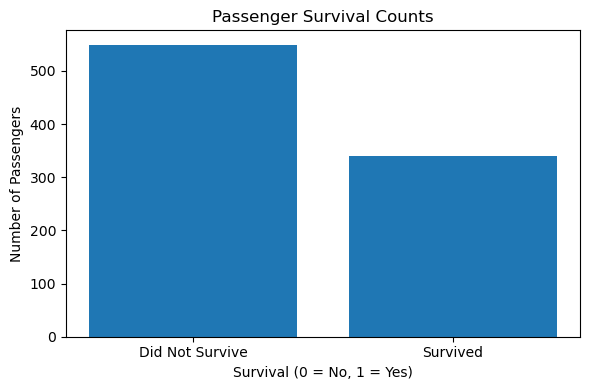

In [23]:
# Get counts of each survival class
index = df["Survived"].value_counts().index
values = df["Survived"].value_counts().values

plt.figure(figsize=(6, 4))
plt.bar(index, values)

plt.xlabel("Survival (0 = No, 1 = Yes)")
plt.ylabel("Number of Passengers")
plt.title("Passenger Survival Counts")
plt.xticks(index, labels=["Did Not Survive", "Survived"])

plt.tight_layout()
plt.show()

**Numerical Variables Distribution: `Age`**

To understand the spread and shape of the data, we visualize the distribution of the Age feature using a histogram combined with a Kernel Density Estimate (KDE):

- The histogram shows how passenger ages are distributed across intervals. It highlights concentrations of values — for example, many passengers appear to be between 20 and 40 years old.

- The KDE curve (in red) offers a smooth approximation of the underlying distribution. Unlike the rigid bins of a histogram, KDE helps us see the overall shape and continuity of the data — such as skewness or multiple peaks.

This kind of plot is valuable for:

- Identifying common age ranges

- Detecting skewed distributions or multi-modal trends

- Spotting areas where data is sparse, which may influence model performance

- Identifying potential outliers or unusual age distributions

By combining histogram and KDE, we get both discrete and continuous perspectives on the same feature, making it easier to decide on transformations (e.g., normalization, binning) or whether age should be treated differently in model pipelines.

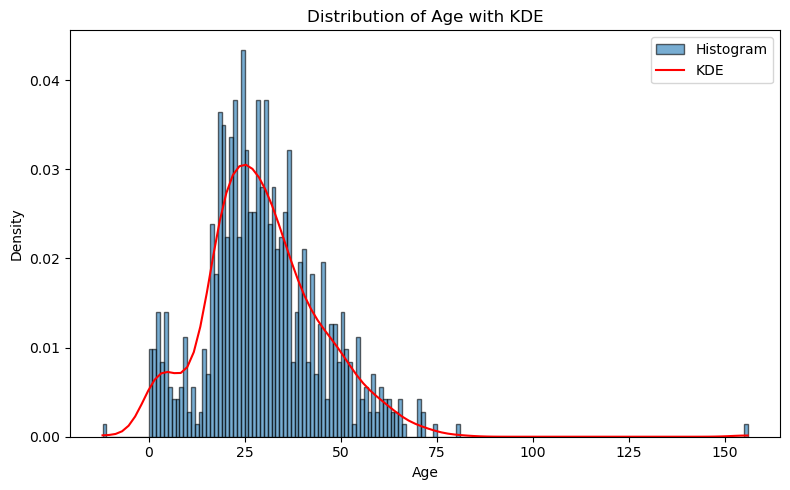

In [24]:
age_data = df['Age'].dropna()

kde = gaussian_kde(age_data)
age_range = np.linspace(age_data.min(), age_data.max(), 100)
kde_values = kde(age_range)

fig, ax = plt.subplots(figsize=(8, 5))
bins = np.arange(age_data.min(), age_data.max() + 1)
ax.hist(age_data, bins=bins, edgecolor='black', density=True, alpha=0.6, label='Histogram')
ax.plot(age_range, kde_values, color='red', label='KDE')

ax.set_title('Distribution of Age with KDE')
ax.set_xlabel('Age')
ax.set_ylabel('Density')
ax.legend()

ax.set_axisbelow(True)
ax.grid(False) 
plt.tight_layout()
plt.show()

<b style="color:red;">Exercise</b>: Remove the outliers from the *Age* column and plot again the histogram with the KDE curve

In [25]:
# display the rows with negative ages
print("Rows with negative 'Age':")
mask = (df['Age'] < 0) | (df['Age'] > 100)
display(df[mask])

Rows with negative 'Age':


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,0,3,"Moran, Mr. James",male,-12.0,0,0,330877,8.4583,NaN,Q
19,1,3,"Masselmani, Mrs. Fatima",female,156.0,0,0,2649,7.2250,NaN,C


In [26]:
# drop the rows 
df.drop(df[mask].index, inplace=True)

**Categorical Features Distribution**

Visualizing categorical variables helps us understand the composition and potential impact of each category on the target variable. By plotting count distributions, we can quickly detect:

- Imbalances between categories (e.g., more males than females)
- Dominant groups within features like Sex, Pclass, Embarked, etc.
- Potential patterns or groupings relevant for modeling and feature engineering

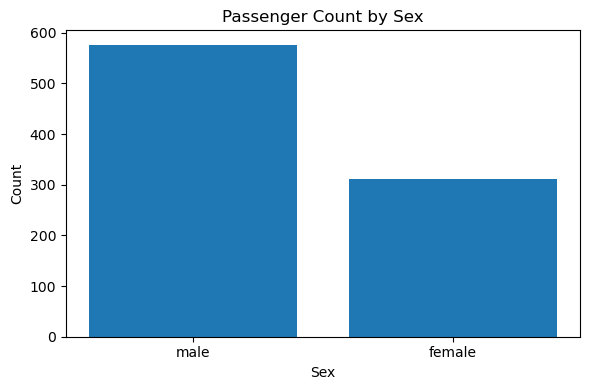

In [27]:
sex_counts = df['Sex'].value_counts()

fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(sex_counts.index, sex_counts.values)

ax.set_title('Passenger Count by Sex')
ax.set_xlabel('Sex')
ax.set_ylabel('Count')
ax.set_axisbelow(True)
ax.grid(False)  
plt.tight_layout()
plt.show()


**Boxplot of Age by Survival**

In descriptive statistics, a box plot or boxplot is a method for demonstrating graphically the locality, spread and skewness groups of numerical data through their quartiles.
In addition to the box on a box plot, there can be lines (which are called whiskers) extending from the box indicating variability outside the upper and lower quartiles.
Outliers that differ significantly from the rest of the dataset may be plotted as individual points beyond the whiskers on the box-plot. Box plots are non-parametric: they display variation in samples of a statistical population without making any assumptions of the underlying statistical distribution.

[Boxplot - Wikipedia](https://en.wikipedia.org/wiki/Box_plot)

**Elements of Box Plot**

A box plot gives a five-number summary of a set of data which is:

- Minimum – It is the minimum value in the dataset excluding the outliers.
- First Quartile (Q1) – 25% of the data lies below the First (lower) Quartile.
- Median (Q2) – It is the mid-point of the dataset. Half of the values lie below it and half above.
- Third Quartile (Q3) – 75% of the data lies below the Third (Upper) Quartile.
- Maximum – It is the maximum value in the dataset excluding the outliers.

![types-of-data-img](img/boxplot_example.jpg)


The area inside the box (50% of the data) is known as the Inter Quartile Range. The IQR is calculated as:

$IQR = Q3-Q1$

Outlies are the data points below and above the lower and upper limit. The lower and upper limit is calculated as:

$Lower Limit = Q1 - 1.5*IQR$

$Upper Limit = Q3 + 1.5*IQR$

The values below and above these limits are considered outliers and the minimum and maximum values are calculated from the points which lie under the lower and upper limit.

[Boxplot -geeksforgeeks](https://www.geeksforgeeks.org/box-plot/)

Here, we use a boxplot to examine how age varies between passengers who survived and those who did not.

/tmp/ipykernel_1904841/2828443331.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([survived_0, survived_1], labels=['Not Survived', 'Survived'])


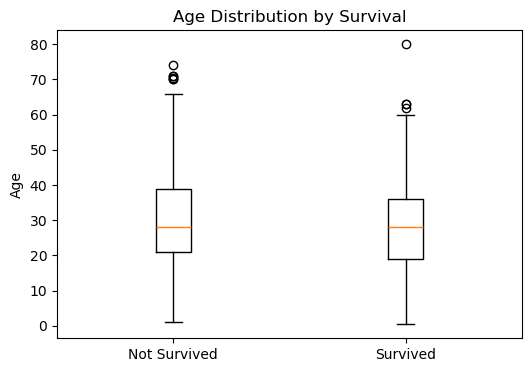

In [28]:
survived_0 = df[df['Survived'] == 0]['Age'].dropna()
survived_1 = df[df['Survived'] == 1]['Age'].dropna()

fig, ax = plt.subplots(figsize=(6, 4))
ax.boxplot([survived_0, survived_1], labels=['Not Survived', 'Survived'])

ax.set_title('Age Distribution by Survival')
ax.set_ylabel('Age')

ax.set_axisbelow(True)
ax.grid(False)

**Correlation Heatmap**

A correlation heatmap is a graphical tool used in statistics and data analysis to visualize the **strength** and **direction** of relationships between multiple numerical variables simultaneously. It displays a correlation matrix where each variable is represented both as a row and a column, and each cell shows the correlation coefficient between the pair of variables it intersects.

![types-of-data-img](img/correlation.jpg)

The values in the heatmap cells are correlation coefficients, typically Pearson’s correlation, which range from -1 to 1. A value of 1 indicates a perfect positive **linear relationship** (as one variable increases, the other increases), -1 indicates a perfect negative **linear relationship** (one variable increases as the other decreases), and 0 indicates no linear relationship

In preprocessing, identifying highly correlated variables is crucial. Variables with very high positive or negative correlations (e.g., above 0.7 or below -0.7) may indicate redundancy or multicollinearity, which can affect model performance. Heatmaps help pinpoint such variables for potential removal or transformation

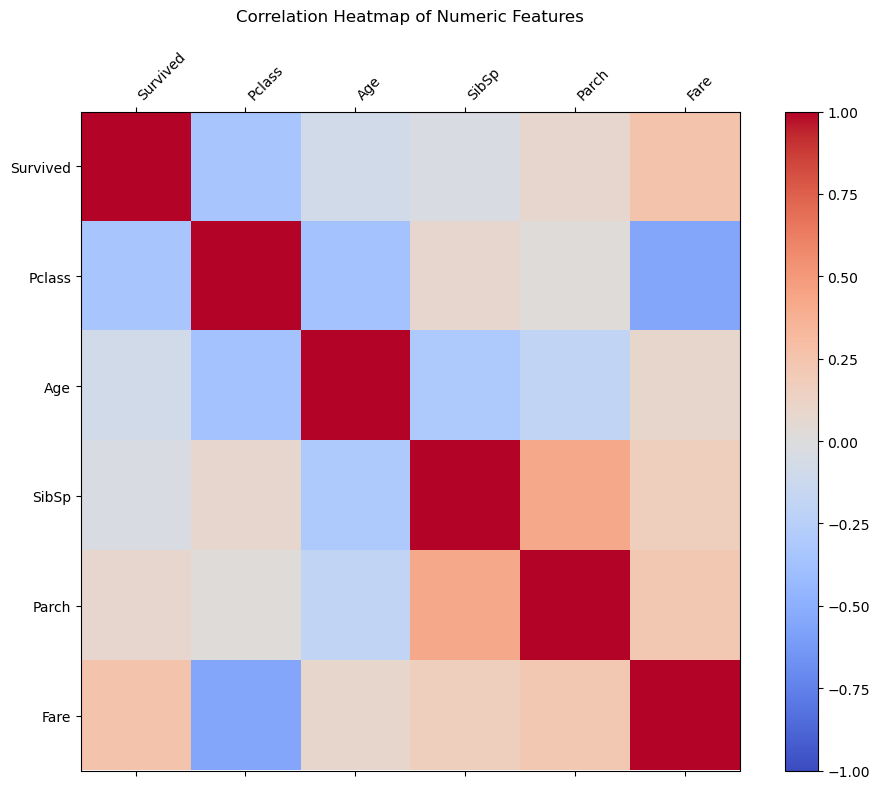

In [29]:
corr = df.select_dtypes(include=[np.number]).corr()

fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(corr, cmap='coolwarm', vmin=-1, vmax=1)

fig.colorbar(cax)

ax.set_xticks(range(len(corr.columns)))
ax.set_yticks(range(len(corr.columns)))

ax.set_xticklabels(corr.columns, rotation=45, ha='left')
ax.set_yticklabels(corr.columns)

ax.set_title('Correlation Heatmap of Numeric Features', pad=20)
ax.set_axisbelow(True)
ax.grid(False)

plt.tight_layout()
plt.show()


<b style="color:red;">Exercise</b>: See the actual correlation between the *Pclass* feature and the *Survived* target variable

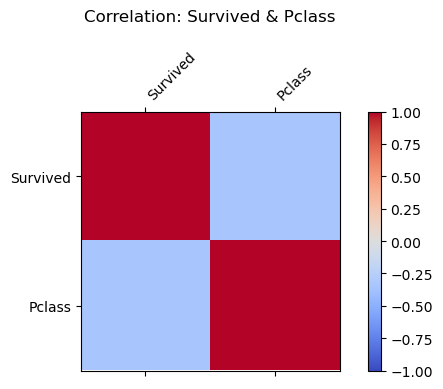

In [30]:
selected_cols = df[['Survived', 'Pclass']]
corr_selected = selected_cols.corr()

fig, ax = plt.subplots(figsize=(6, 4))
cax = ax.matshow(corr_selected, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)

ax.set_xticks(range(len(corr_selected.columns)))
ax.set_yticks(range(len(corr_selected.columns)))
ax.set_xticklabels(corr_selected.columns, rotation=45, ha='left')
ax.set_yticklabels(corr_selected.columns)

ax.set_axisbelow(True)
ax.grid(False)
ax.set_title('Correlation: Survived & Pclass', pad=20)

plt.tight_layout()
plt.show()

## Exploring Feature Relationships

Before performing any advanced analysis or modeling, it is essential to explore and understand the underlying structure of the dataset. One fundamental tool for this process is the <code>[DataFrame.groupby()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)</code> function in the pandas library, which allows for the aggregation and summarization of data based on one or more categorical features. By grouping data, we can uncover patterns, compare subsets, and derive meaningful insights that would otherwise remain hidden in raw tables. The following exercises are designed to develop familiarity with <code>[DataFrame.groupby()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)</code> operations and demonstrate how systematic data exploration leads to a deeper understanding of trends, distributions, and relationships within the data.

### Grouped statistics

Pandas <code>[DataFrame.groupby()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)</code> function is a powerful tool used to split a DataFrame into groups based on one or more columns, allowing for efficient data analysis and aggregation. It follows a “split-apply-combine” strategy, where data is divided into groups, a function is applied to each group, and the results are combined into a new DataFrame.

The groupby() function in Pandas involves three main steps: Splitting, Applying, and Combining.

- Splitting: This step involves dividing the DataFrame into groups based on some criteria. The groups are defined by unique values in one or more columns.

- Applying: In this step, a function is applied to each group independently. You can apply various functions to each group, such as:
    - Aggregation: Calculate summary statistics (e.g., sum, mean, count) for each group.
    - Transformation: Modify the values within each group.
    - Filtering: Keep or discard groups based on certain conditions.

- Combining: Finally, the results of the applied function are combined into a new DataFrame or Series.

[Pandas DataFrame.groupby() Method - geeksforgeeks](https://www.geeksforgeeks.org/python-pandas-dataframe-groupby/)

The abstract definition of grouping is to provide a mapping of labels to group names.
For **DataFrame objects**, a string indicating either a column name or an index level name to be used to group.

#### Grouping by single columns
In this example, we will demonstrate how to group data by a single column using the <code>[DataFrame.groupby()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)</code> method. We will group by our categorical features, and explore how their relationship with the target feature

In [31]:
# Calculate the average survival rate for each sex (female/male)
df.groupby(by="Sex")["Survived"].mean()

Sex
female    0.739550
male      0.189236
Name: Survived, dtype: float64

This tells us that 
- 74% of women passengers survived
- 18% of men passengers survived
  
thus we could infer that women were more likely to survive

<b style="color:red;">Exercise</b>: Calculate the average survival rate for each passenger ticket class (1st, 2nd, 3rd)

In [32]:
df.groupby(by="Pclass")["Survived"].mean()

Pclass
1    0.626168
2    0.472826
3    0.241309
Name: Survived, dtype: float64

![Titanic cabin assignments through class](img/titanic-figure-one-side-view.png)

[Titanic cabin placement](https://www.encyclopedia-titanica.org/class-gender-titanic-disaster-1912~chapter-2~part-2.html)

​The Titanic disaster highlighted the influence of social class on survival rates. Several factors contributed to this disparity. The ship's design placed first-class accommodations closer to the lifeboats, facilitating quicker access during the evacuation. Additionally, third-class passengers faced physical barriers and lacked clear guidance, which hindered their ability to reach lifeboats in time. These structural and procedural disadvantages underscore how deeply social hierarchies impacted survival outcomes during the tragedy.​

As demonstrated, it is essential to explore data in depth alongside its context, as this approach can uncover meaningful insights into model performance during inference. Understanding the background not only helps interpret results more accurately, but also sheds light on potential biases and patterns that might otherwise go unnoticed. This is particularly crucial when working with historical or real-world datasets, where external factors can significantly influence outcomes.

## Handling Missing Values

It is not uncommon in real-world applications for our samples to be missing one or more values for various reasons. There could have been an error in the data collection process, certain measurements are not applicable, or particular fields could have been simply left blank in a survey, for example. We typically see missing values as the blank spaces in our data table or as placeholder strings such as NaN, which stands for not a number, or NULL (a commonly used indicator of unknown values in relational databases).

Unfortunately, most computational tools are unable to handle such missing values, or produce unpredictable results if we simply ignore them. Therefore, it is crucial that we take care of those missing values before we proceed with further analyses. In this section, we will work through several practical techniques for dealing with missing values by removing entries from our dataset or imputing missing values from other samples and features.

(the material of this section is a reference to *Raschka, S., & Mirjalili, V. (2019). Python machine learning: Machine learning and deep learning with Python, scikit-learn, and TensorFlow 2 (3rd ed.). Packt Publishing.*)


### Eliminating samples or features with missing values

One of the easiest ways to deal with missing data is to simply remove the corresponding features (columns) or samples (rows) from the dataset entirely; rows with missing values can be easily dropped via the dropna method:

In [33]:
print("Data set shape before dropping rows with missing values:", df.shape)
temp = df.dropna(axis=0)
print("Data shape after dropping rows with missing values:", temp.shape)

Data set shape before dropping rows with missing values: (887, 11)
Data shape after dropping rows with missing values: (183, 11)


Similarly, we can drop columns that have at least one <code>NaN</code> in any row by setting the <code>axis</code> argument to 1:

In [34]:
print("Data set shape before dropping columns with missing values:", df.shape)
temp = df.dropna(axis=1)
print("Data shape after dropping columns with missing values:", temp.shape)

Data set shape before dropping columns with missing values: (887, 11)
Data shape after dropping columns with missing values: (887, 9)


The dropna method supports several additional parameters that can come in handy:

In [35]:
# only drop rows where all columns are NaN
df.dropna(how="all")

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [36]:
# only drop rows where NaN appear in specific columns (here: 'Cabin')
df.dropna(subset=['Cabin'])

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


Although the removal of missing data seems to be a convenient approach, it also comes with certain disadvantages; for example, we may end up removing too many samples, which will make a reliable analysis impossible. Or, if we remove too many feature columns, we will run the risk of losing valuable information that our classifier needs to discriminate between classes.

<b style="color:red;">Exercise</b>: Impute the missing values in the <code>Cabin</code> column filling the missing values with the string "Unknown". 
You can use the <code>[DataFrame.fillna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)</code> method to fill the missing values with a specific value.

In [37]:
df['Cabin'].fillna(value='Unknown', inplace=True)

/tmp/ipykernel_1904841/4052767420.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cabin'].fillna(value='Unknown', inplace=True)


## Feature Engineering

Feature engineering is the process of transforming raw data into features that are suitable for machine learning models. In other words, it is the process of selecting, extracting, and transforming the most relevant features from the available data to build more accurate and efficient machine learning models.

The success of machine learning models heavily depends on the quality of the features used to train them. Feature engineering involves a set of techniques that enable us to create new features by combining or transforming the existing ones. These techniques help to highlight the most important patterns and relationships in the data, which in turn helps the machine learning model to learn from the data more effectively.

[What is Feature Engineering? - geeksforgeeks](https://www.geeksforgeeks.org/what-is-feature-engineering/)

| Column Name              | Data Type                   | Description                                                             | Possible Values / Examples                             |
|--------------------------|-----------------------------|-------------------------------------------------------------------------|--------------------------------------------------------|
| Feature Extraction       | String → Categorical         | Extract useful parts from complex fields or derive new features (e.g., dimensionality reduction) | From `Name` → `Title` = "Mr", "Mrs", "Miss", etc.; PCA for dimensionality reduction |
| Feature Transformation   | Numeric                     | Apply mathematical or rule-based transformation to values              | `Fare` → log(Fare), `Age` → square root(Age)           |
| Encoding Categorical     | Categorical → Numeric       | Convert string labels into numeric format for modeling                 | `Sex` = "male", "female" → 1, 0 using `get_dummies()`  |
| Binning                  | Numeric → Categorical       | Divide continuous values into discrete intervals                       | `Age` → "Child", "Adult", "Senior"                     |
| Feature Interaction      | Multiple Columns            | Combine two or more columns to create meaningful relationships         | `FamilySize` = `SibSp` + `Parch` + 1                   |
| Datetime Decomposition   | Datetime → Numeric/Categorical | Break down datetime into parts like year, month, day, etc.            | `2023-04-19` → year = 2023, month = 4                  |
| Scaling / Normalization  | Numeric                     | Scale numeric values to a common range or distribution                 | `Fare` → 0–1 using MinMaxScaler                        |
| Missing Value Imputation | Any                        | Fill missing values with mean, median, mode, or prediction             | `Age` → fill missing with median age (e.g., 28.0)      |



### Handling categorical data

**Feature Extraction & Encoding for Nominal Variables:**

Feature extraction for nominal (categorical) data involves transforming raw categorical variables into new, meaningful features that can be effectively used in machine learning models. This process often includes extracting patterns or subcomponents from the nominal data to capture relevant information such as social status, gender, or groupings that may influence the prediction target.

Nominal data in our dataset, such as **names** or **cabin identifiers**, are non-numeric and cannot be directly used by most machine learning algorithms. Feature extraction techniques for nominal data typically involve:

- Parsing and extracting meaningful components: For example, extracting titles (Mr, Mrs, Miss) from passenger names to capture social status or demographics.

- Decomposing complex categorical variables: Breaking down a cabin number into a deck letter and a numeric part to capture location information.

- Encoding categorical variables: Converting extracted features into formats suitable for modeling, such as one-hot encoding or numeric encoding.

This code extracts passenger titles (such as Mr., Mrs., Miss, etc.) from the Name column in the dataset. It uses the <code>[str.split()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.split.html)</code> method to capture the string that appears between a comma and a period, which typically corresponds to the title.

In [38]:
# Extract title from passenger name
name = df['Name']
title = name.str.split(',', expand=True)[1].str.split('.', expand=True)[0]

# View unique titles
print("Unique titles found:")
title.unique()

Unique titles found:


array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], dtype=object)

<b style="color:red;">Exercise</b>: To help identify the cabin location of the passengers, we can extract the deck letter and the cabin number from the *Cabin* column. The cabin number is a string that contains both letters and numbers (e.g., 'C85'). We can use regular expressions to extract both the deck letter and the cabin number. 
Take a look at the <code>[str.extract()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.extract.html)</code> and <code>[pandas.to_numeric()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html)</code> methods to extract the cabin number.

In [39]:
cabin = df["Cabin"]
cabin_deck = cabin.str[0]
cabin_number = pd.to_numeric(cabin.str.extract(r'(\d+)')[0], errors="coerce")

print(f"Cabin decks: {cabin_deck.unique()}")
print(f"Min and Max cabin number: {(cabin_number.min(), cabin_number.max())}")

Cabin decks: ['U' 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']
Min and Max cabin number: (2.0, 148.0)


Our model can’t handle text labels like 'male' or 'female',  <code>[pandas.get_dummies()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)</code> convert categorical variable into dummy/indicator variables.

Each variable is converted in as many 0/1 variables as there are different values. Columns in the output are each named after a value; if the input is a DataFrame, the name of the original variable is prepended to the value.

In [40]:
# Encode 'Sex' column into binary variables (0 or 1)
df_encoded = pd.get_dummies(df, columns=['Sex']) # by setting drop_first = 1, the first dummy column will be dropped, since it has redundant information
print(df_encoded[["Sex_female", "Sex_male"]].head())

   Sex_female  Sex_male
0       False      True
1        True     False
2        True     False
3        True     False
4       False      True


Alternatively we can use <code>[sklearn.preprocessing.OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)</code> to perform one-hot encoding. This is a more flexible and powerful approach, especially when dealing with larger datasets or when you need to handle unknown categories. Take a look at the documentation to discover all the potential options!

With one-hot, we convert each categorical value into a new categorical column and assign a binary value of 1 or 0 to those columns. Each integer value is represented as a binary vector. All the values are zero, and the index is marked with a 1.

In [41]:
ohe = OneHotEncoder(categories=[["Q", "S", "C"]], handle_unknown="ignore")
embarked = ohe.fit_transform(df[["Embarked"]])
embarked_df = pd.DataFrame(embarked.toarray(), columns=ohe.get_feature_names_out(["Embarked"]))

embarked_df

,Embarked_Q,Embarked_S,Embarked_C
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
882,0.0,1.0,0.0
883,0.0,1.0,0.0
884,0.0,1.0,0.0
885,0.0,0.0,1.0


### Handling numerical data (Feature Scaling)

**Feature scaling** is an important step in the preprocessing pipeline for many machine learning models, even though some algorithms, like decision trees and random forests, do not require it. These models are "scale invariant," meaning that the performance of the algorithm does not change with different feature scales. However, many other machine learning algorithms benefit from feature scaling because their performance can be affected by the differences in the magnitude of features.

To better understand the significance of feature scaling, let's take a look at two concrete examples:

1. Gradient Descent (Linear Regression or Logistic Regression)
Imagine you are working with a dataset that includes two features:

    Feature 1 (Income): Ranges from 10,000 to 100,000 (in dollars).

    Feature 2 (Age): Ranges from 18 to 70 (in years).

    When you use gradient descent to minimize the cost function (e.g., mean squared error), the algorithm adjusts weights based on the features. If the income feature has values that are much larger than the age feature, the model will tend to focus more on optimizing the weight of the income feature because the numerical range of income is much larger. As a result, the model may not learn as effectively from the age feature.

    If both features were scaled to have a similar range (e.g., between 0 and 1 or with a standard deviation of 1), the gradient descent algorithm would update both weights more evenly, leading to a more balanced and effective model.

2. k-Nearest Neighbors (KNN)
    Consider a dataset with the following two features:

    Feature 1 (Distance to school): Ranges from 0 to 5 kilometers.

    Feature 2 (Annual salary): Ranges from 20,000 to 200,000 (in dollars).

    When using k-nearest neighbors (KNN) with the Euclidean distance metric to classify or predict, the distances between samples are calculated based on the features. However, the distance calculation involves squaring the differences of each feature's value, and the larger the feature's range, the more influence it has on the final distance. In this case, the salary feature will dominate the distance calculation because its range is much larger than that of the distance to school feature.

    For example, if two data points differ significantly in salary but have very similar distances to school, the KNN algorithm might incorrectly assign a higher weight to the salary difference due to its larger scale, making the distance metric less representative of the actual similarities between data points.

    If both features were scaled to the same range, the distance between samples would be influenced equally by both features, leading to more accurate classifications or predictions.

Now, there are two common approaches to bring different features onto the same scale: **normalization** and **standardization**. Those terms are often used quite loosely in different fields, and the meaning has to be derived from the context. Most often, **normalization** refers to the rescaling of the features to a range of \([0, 1]\), which is a special case of **min-max scaling**.

To normalize our data, we can simply apply the min-max scaling to each feature column, where the new value of a sample can be calculated as follows:

$X_{\text{normalized}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}$


Where:
- $X_{\text{normalized}}$ is the normalized value of the feature.

- $X$ is the original value of the feature.

- $X_{\text{min}}$ is the minimum value of the feature.

- $X_{\text{max}}$ is the maximum value of the feature.

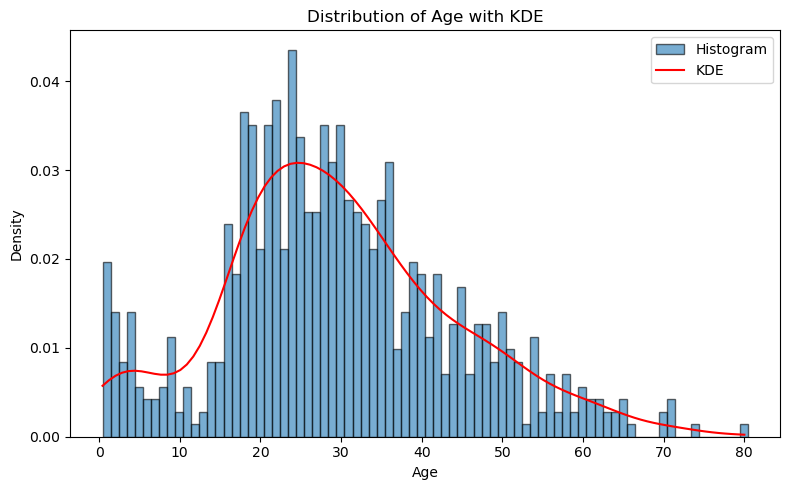

In [42]:
age_data = df['Age'].dropna()

kde = gaussian_kde(age_data)
age_range = np.linspace(age_data.min(), age_data.max(), 100)
kde_values = kde(age_range)
fig, ax = plt.subplots(figsize=(8, 5))
bins = np.arange(age_data.min(), age_data.max() + 1)
ax.hist(age_data, bins=bins, edgecolor='black', density=True, alpha=0.6, label='Histogram')
ax.plot(age_range, kde_values, color='red', label='KDE')

ax.set_title('Distribution of Age with KDE')
ax.set_xlabel('Age')
ax.set_ylabel('Density')
ax.legend()
ax.set_axisbelow(True)
ax.grid(False) 
plt.tight_layout()
plt.show()

In [43]:
# Let's apply MinMaxScaling to our Age feature
mm_scaler = MinMaxScaler()
age = df["Age"].values.reshape(-1, 1)
normalized_age = mm_scaler.fit_transform(age)
print(f"Normalized age maximum: {max(normalized_age)}")
print(f"Normalized age minimum: {min(normalized_age)}")

Normalized age maximum: [1.]
Normalized age minimum: [0.]


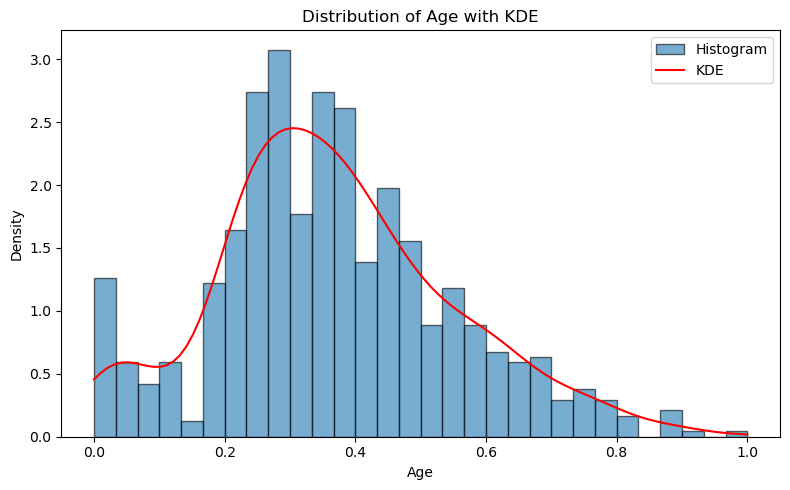

In [44]:
normalized_age = normalized_age[~np.isnan(normalized_age)]

kde = gaussian_kde(normalized_age)
age_range = np.linspace(normalized_age.min(), normalized_age.max(), 100)
kde_values = kde(age_range)

fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(normalized_age, bins=30, edgecolor='black', density=True, alpha=0.6, label='Histogram')
ax.plot(age_range, kde_values, color='red', label='KDE')

ax.set_title('Distribution of Age with KDE')
ax.set_xlabel('Age')
ax.set_ylabel('Density')
ax.legend()
ax.set_axisbelow(True)
ax.grid(False)
plt.tight_layout()
plt.show()

Although normalization via min-max scaling is a commonly used technique that is useful when we need values in a bounded interval, **standardization** can be more practical for many machine learning algorithms, especially for optimization algorithms such as gradient descent. The reason is that many linear models initialize the weights to 0 or small random values close to 0. Using standardization, we center the feature columns at a mean of 0 with a standard deviation of 1, so that the feature columns take the form of a normal distribution, which makes it easier to learn the weights.

Furthermore, standardization maintains useful information about outliers and makes the algorithm less sensitive to them, in contrast to min-max scaling, which scales the data to a limited range of values.

The procedure for **standardization** can be expressed by the following equation:

$X_{\text{standardized}} = \frac{X - \mu}{\sigma}$

Where:
- $X_{\text{standardized}}$ is the standardized value of the feature.

- $X$ is the original value of the feature.

- $\mu$ is the sample mean of the feature.

- $\sigma$ is the standard deviation of the feature.

In [45]:
ss_scaler = StandardScaler()
age = df["Age"].dropna().values.reshape(-1, 1)
standardized_age = ss_scaler.fit_transform(age)

print(f"Standardized age maximum: {max(standardized_age)}")
print(f"Standardized age minimum: {min(standardized_age)}")
print(f"Standardized age mean: {round(np.mean(standardized_age), 10)}")
print(f"Standardized age standard deviation: {round(np.std(standardized_age), 10)}")

Standardized age maximum: [3.47709526]
Standardized age minimum: [-2.01771689]
Standardized age mean: 0.0
Standardized age standard deviation: 1.0


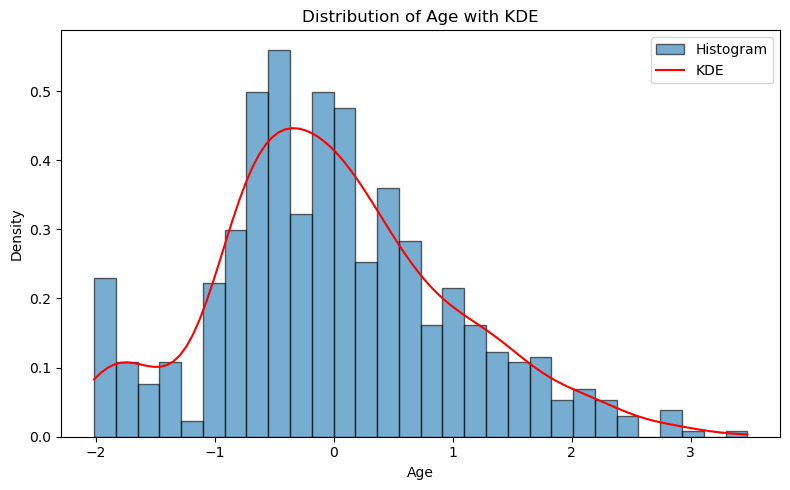

In [46]:
standardized_age = standardized_age[~np.isnan(standardized_age)]

kde = gaussian_kde(standardized_age)
age_range = np.linspace(standardized_age.min(), standardized_age.max(), 100)
kde_values = kde(age_range)

fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(standardized_age, bins=30, edgecolor='black', density=True, alpha=0.6, label='Histogram')
ax.plot(age_range, kde_values, color='red', label='KDE')

ax.set_title('Distribution of Age with KDE')
ax.set_xlabel('Age')
ax.set_ylabel('Density')
ax.legend()
ax.set_axisbelow(True)
ax.grid(False)
plt.tight_layout()
plt.show()

### Pipeline, Column Transformers and Custom Transformers

The process of transforming raw data into a model-ready format often involves a series of steps, including data preprocessing, feature selection, and model training. Managing these steps efficiently and ensuring reproducibility can be challenging. This is where <code>[sklearn.pipeline.Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)</code> from the scikit-learn library comes into play.

The **Pipeline** class in scikit-learn is a powerful tool designed to streamline the machine learning workflow. It allows you to chain together multiple steps, such as data transformations and model training, into a single, cohesive process. This not only simplifies the code but also ensures that the same sequence of steps is applied consistently to both training and testing data, thereby reducing the risk of data leakage and improving reproducibility.

To illustrate the use of scikit-learn pipelines, let's walk through a simple example where we apply a series of transformations to the "Age" feature in a dataset. In this example, we will:

- Impute missing values in the "Age" column with the mean value.

- Standardize the "Age" values, so they have a mean of 0 and a standard deviation of 1.

We will use the **Pipeline** class from scikit-learn to combine these two steps into one unified process, making it easier to manage and apply consistently.

In [47]:
print("Before ...")
print(f"Age min/max: {df['Age'].min():.2f}, {df['Age'].max():.2f}")
print(f"Age missing values: {df['Age'].isna().sum()}")

age_pipeline = Pipeline([
    ("mean_imp", SimpleImputer(strategy="mean")),
    ("ss_scaler", StandardScaler())
])

age_transformed = age_pipeline.fit_transform(df[["Age"]])  # Returns NumPy array

print("\nAfter ...")
print(f"Age min/max: {age_transformed.min():.2f}, {age_transformed.max():.2f}") 
print(f"Age missing values: {np.isnan(age_transformed).sum()}")

Before ...
Age min/max: 0.42, 80.00
Age missing values: 175

After ...
Age min/max: -2.25, 3.88
Age missing values: 0


**Custom Transformers in scikit-learn**

In many cases, standard transformers like SimpleImputer and StandardScaler are not sufficient for specific tasks. For such situations, we can create custom transformers that can be used just like the built-in ones, while performing more complex transformations.

A custom transformer is a class that inherits from BaseEstimator and TransformerMixin in scikit-learn. The primary responsibility of a custom transformer is to define two methods:

- <code>fit(...)</code>: This method is used to learn any necessary parameters from the data. For simple transformations that don't require fitting (like string manipulation), you can leave this method empty.
  
- <code>transform(...)</code>: This method performs the actual transformation of the data.
  
- <code>get_feature_names_out(...)</code>: (Optional but recommended) This method defines the names of the output features, useful when using pipelines or ColumnTransformers.

Let’s look at an example where we create a custom transformer to preprocess the "Cabin" feature in the Titanic dataset.

In the Titanic dataset, the "Cabin" column contains string values, which include both the deck (a letter) and the cabin number (a number). We can create a custom transformer to extract and separate these values into two new columns: CabinDeck and CabinNumber.

In [48]:
class CabinTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass 

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = pd.Series(X.flatten()) 
        
        deck = X.str[0]  # First letter (deck)
        number = X.str.extract(r'(\d+)')  # Extract numbers
        
        cabin_number = pd.to_numeric(number[0], errors='coerce')
        
        # Combine deck and scaled cabin number into a DataFrame
        transformed = pd.DataFrame({
            'CabinDeck': deck,
            'CabinNumber': cabin_number
        })

        return transformed

    def get_feature_names_out(self, input_features=None):
        # After transform, this transformer outputs a single column "Title"
        return np.array(["CabinDeck", "CabinNumber"])

In [49]:
cabin_pipeline = Pipeline([
    ("imp", SimpleImputer(strategy="most_frequent")),  # Impute missing values with the most frequent value
    ("custom_transformer", CabinTransformer())  # Apply the custom CabinTransformer
])


transformed_cabin = cabin_pipeline.fit_transform(df[["Cabin"]])
display(transformed_cabin)

,CabinDeck,CabinNumber
0,U,NaN
1,C,85.0
2,U,NaN
3,C,123.0
4,U,NaN
...,...,...
882,U,NaN
883,B,42.0
884,U,NaN
885,C,148.0


**ColumnTransformer in scikit-learn**

`ColumnTransformer` is a utility in `scikit-learn` that allows you to apply different transformations to different subsets of columns in your dataset. It's particularly useful when working with datasets that contain various types of features (e.g., numerical, categorical, text) that require distinct preprocessing steps.

In a machine learning pipeline, preprocessing is a crucial step to transform raw data into a suitable format for model training. The `ColumnTransformer` helps by enabling separate processing for different features, without needing to manually split the dataset or write custom logic.

A `ColumnTransformer` allows you to specify a list of transformers to be applied to specific subsets of columns. The general format looks like this:

```python
from sklearn.compose import ColumnTransformer

column_transformer = ColumnTransformer(
    transformers=[
        ('name_of_transformer', transformer_object, columns_to_transform)
    ]
)
```

Where:
- **`name_of_transformer`**: This is a string label that names the transformation. It can be anything descriptive, like `'scaler'`, `'encoder'`, etc.

- **`transformer_object`**: This is the transformer object that will be applied to the selected columns. This could be a `StandardScaler`, `SimpleImputer`, `OneHotEncoder`, etc.

- **`columns_to_transform`**: A list or a string specifying which columns should be transformed. You can select columns by name, index, or condition (such as numerical columns).


Before instantiating our custom transformations and pipelines, let's first outline the transformations we need to apply to each column in the dataset:

- `PassengerId`: Drop column (since it's just an identifier and doesn't contribute to the model).

- `Pclass`: Ordinal Encoding (using OrdinalEncoder) - This variable has a meaningful order (1st class > 2nd class > 3rd class), so it's encoded as integers while preserving the ordinal relationship.

- `Sex`: Binary Encoding using OneHotEncoder (OneHotEncoder(drop="first")) - This encodes male and female as binary values, with the first category dropped to avoid multicollinearity.

- `Age`: Mean imputation (SimpleImputer(strategy="mean")) followed by MinMax scaling (MinMaxScaler) - Missing values are filled with the mean age, and the values are then scaled to the range [0, 1].

- `SibSp & Parch`: Custom transformation (FamilySizeTransformer) to create a new feature FamilySize, which is the sum of SibSp and Parch - This gives a better representation of family size, which may be more informative than the individual columns.

- `Embarked`: Most frequent imputation (SimpleImputer(strategy="most_frequent")) followed by OneHotEncoding (OneHotEncoder) - Missing values are imputed with the most frequent value, and then the categorical values are encoded using OneHotEncoding.

- `Fare`: Applied StandardScaler - This variable is scaled to have a mean of 0 and a standard deviation of 1.

In [50]:
class NameTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        # Extract the Title from the Name column
        names = X["Name"]
        titles = names.str.split(',', expand=True)[1].str.split('.', expand=True)[0]
        return pd.DataFrame({"Title": titles})
    
    def get_feature_names_out(self, input_features=None):
        # After transform, this transformer outputs a single column "Title"
        return np.array(["Title"])

In [51]:
class FamilySizeTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # Compute family size
        X_copy = X.copy()
        X_copy['FamilySize'] = X_copy['SibSp'] + X_copy['Parch'] + 1
        return X_copy[['FamilySize']]
    
    def get_feature_names_out(self, input_features=None):
        # After transform, this transformer outputs a single column "FamilySize"
        return np.array(["FamilySize"])

Now that we've defined our custom transformers, we can build individual pipelines for each feature or group of features. Each pipeline handles the specific preprocessing steps required for that column, such as imputation, scaling, encoding, or applying custom logic.

In [52]:
pclass_pipeline = Pipeline([
    ("ohe", OrdinalEncoder())
])

sex_pipeline = Pipeline([
    ("binary_ohe", OneHotEncoder(drop="first", handle_unknown="ignore", sparse_output=False))
])

age_pipeline = Pipeline([
    ("mean_imp", SimpleImputer(strategy="mean")),
    ("mm_scaler", MinMaxScaler())
])

family_pipeline = Pipeline([
    ("custom_trans", FamilySizeTransformer())
])

embarked_pipeline = Pipeline([
    ("most_freq_imp", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(drop="first", handle_unknown="ignore", sparse_output=False))
])

After defining all individual pipelines, we can combine them into a single ColumnTransformer. This allows us to apply the appropriate preprocessing steps to each subset of features in a clean and organized way, all within one unified transformation.

In [53]:
final_transformation = ColumnTransformer(
    transformers=[
        ("pclass_preprocess", pclass_pipeline, ["Pclass"]),
        ("sex_preprocess", sex_pipeline, ["Sex"]),
        ("age_preprocess", age_pipeline, ["Age"]),
        ("sibsp_parch_preprocess", family_pipeline, ["SibSp", "Parch"]),
        ("embarked_preprocess", embarked_pipeline, ["Embarked"]), 
        ("fare_preprocess", StandardScaler(), ["Fare"])
        ],
    remainder="drop",
    verbose_feature_names_out=True,
    sparse_threshold=0
)

Before applying the transformation, we split the dataset into features (X) and the target variable (y). This ensures that the target variable (Survived) is not included in the transformations, as it should remain separate and only be used for model training or evaluation. The remainder="drop" parameter in the ColumnTransformer ensures that any columns not explicitly specified for transformation are dropped from the final output.

In [54]:
X, y = df.drop(columns=["Survived"]), df["Survived"]

transformed_array = final_transformation.fit_transform(X)
feature_names = final_transformation.get_feature_names_out()

transformed_df = pd.DataFrame(transformed_array, columns=feature_names, index=X.index)
transformed_df.head()

,pclass_preprocess__Pclass,sex_preprocess__Sex_male,age_preprocess__Age,sibsp_parch_preprocess__FamilySize,embarked_preprocess__Embarked_Q,embarked_preprocess__Embarked_S,fare_preprocess__Fare
0,2.0,1.0,0.271174,2.0,0.0,1.0,-0.501758
1,0.0,0.0,0.472229,2.0,0.0,0.0,0.786629
2,2.0,0.0,0.321438,1.0,0.0,1.0,-0.488176
3,0.0,0.0,0.434531,2.0,0.0,1.0,0.420770
4,2.0,1.0,0.434531,1.0,0.0,1.0,-0.485661


In [55]:
# look duplicated rows 
print("Duplicated rows in the transformed DataFrame:", transformed_df.duplicated().sum())

Duplicated rows in the transformed DataFrame: 128


**Why so many “duplicates”?**  
After feature engineering and encoding, multiple distinct passengers end up with exactly the same values across all transformed features *and* the same survival label. For example, two female passengers in 3rd class, both aged 24 (imputed or binned the same), with identical family size and embarkation port - all of those collapse to an identical feature vector. These are *not* data errors but simply reflect that our pipeline maps different raw records to the same engineered profile.

Having validated that our final dataset is clean, complete, and fully numeric, we’re now ready to move on to model building and evaluation in Lab 2!

In [56]:
# attach the target column to the transformed DataFrame
transformed_df["Survived"] = y.values

# save the final DataFrame to a CSV file
transformed_df.to_csv("../Lab-02/data/my_titanic.csv", index=False)

## EXTRA EXERCISE -- Unsupervised Exploration: PCA & t-SNE

When we have many numeric features, it can be hard to visualize or understand the “shape” of the data in its full dimensionality. Two popular techniques—**PCA** and **t-SNE**—help us project high-dimensional data into 2D (or 3D) so we can:

- **See clusters** or separations between classes.  
- **Detect outliers** or unexpected structure.  
- **Decide** if reduced representations might be useful for modeling or further feature engineering.

### Principal Component Analysis (PCA)

PCA is a **linear** technique that finds new orthogonal axes (principal components) that capture the most variance in the data.

1. **Standardize** each feature to mean 0, variance 1.  
2. **Compute** the covariance matrix of the standardized data.  
3. **Eigen-decompose** → get eigenvectors (directions) and eigenvalues (variance explained).  
4. **Order** components by descending eigenvalue and **project** your data onto the top _k_ components.

**Why it helps in EDA/preprocessing**  
- You can plot the first two PCs and color by `Survived` to see if survivors cluster apart.  
- The **explained-variance ratio** tells you how many components capture, say, 90% of the variance—guiding dimensionality reduction.  
- By comparing model performance on the top _n_ PCs vs. all features, you learn how much information lives in those directions.

Explained variance ratio (2 PCs): [0.25489733 0.22100665]


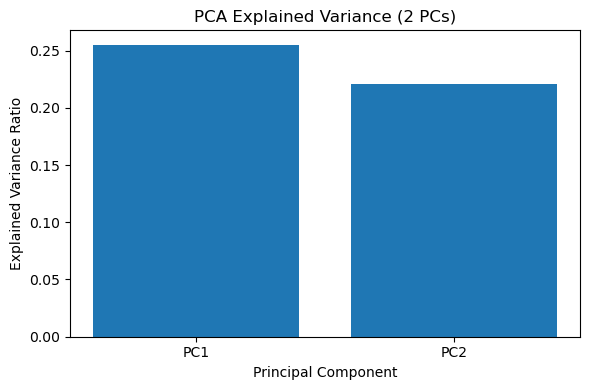

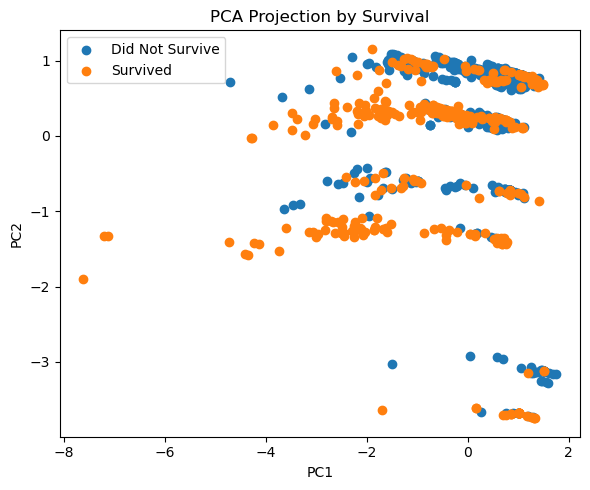

In [57]:
# 1. Select and standardize numeric columns
num_cols = transformed_df.drop(columns="Survived").select_dtypes(include="number").columns
X_num    = transformed_df[num_cols].values
X_scaled = StandardScaler().fit_transform(X_num)

# 2. Fit PCA
pca    = PCA(n_components=2)
X_pca2 = pca.fit_transform(X_scaled)

# 3. Explained variance
print("Explained variance ratio (2 PCs):", pca.explained_variance_ratio_)

# 4. Plot explained-variance ratio
plt.figure(figsize=(6,4))
plt.bar([1, 2], pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance (2 PCs)')
plt.xticks([1,2], ['PC1','PC2'])
plt.tight_layout()
plt.show()

# 5. Scatter plot of the first two PCs, colored by survival
survived = transformed_df['Survived'].values
plt.figure(figsize=(6,5))
plt.scatter(
    X_pca2[survived == 0, 0],
    X_pca2[survived == 0, 1],
    label='Did Not Survive'
)
plt.scatter(
    X_pca2[survived == 1, 0],
    X_pca2[survived == 1, 1],
    label='Survived'
)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection by Survival')
plt.legend()
plt.tight_layout()
plt.show()

### t-Distributed Stochastic Neighbor Embedding (t-SNE)
t-SNE is a **non-linear** technique that excels at preserving **local** structure (neighborhoods) in a 2D embedding.

1. Compute pairwise similarities in high-dim space using Gaussian probabilities.

2. Define pairwise similarities in low-dim space with a heavy-tailed Student’s t distribution.

3. Optimize the embedding by minimizing the Kullback–Leibler divergence between the two distributions via gradient descent.

**Why it helps in EDA/preprocessing**

- It often reveals clusters or subpopulations that PCA (linear) might miss.

- Good for visualization, but not typically used as a direct input to models (it doesn’t preserve global distances).

- Requires tuning perplexity (roughly, neighborhood size) and learning rate.

t-SNE embedding shape: (887, 2)


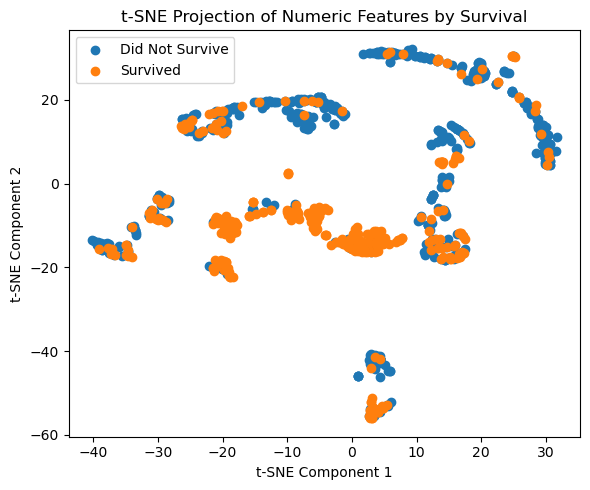

In [58]:
# 1. Fit t-SNE on your standardized numeric data
tsne    = TSNE(n_components=2, random_state=42)
X_tsne2 = tsne.fit_transform(X_scaled)

# 2. Report the shape
print("t-SNE embedding shape:", X_tsne2.shape)

# 3. Scatter plot of the embedding, colored by survival
survived = transformed_df['Survived'].values

plt.figure(figsize=(6, 5))
plt.scatter(
    X_tsne2[survived == 0, 0],
    X_tsne2[survived == 0, 1],
    label='Did Not Survive'
)
plt.scatter(
    X_tsne2[survived == 1, 0],
    X_tsne2[survived == 1, 1],
    label='Survived'
)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Projection of Numeric Features by Survival')
plt.legend()
plt.tight_layout()
plt.show()